In [1]:
#Import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
color=plt.rcParams['axes.prop_cycle'].by_key()['color']

# Loading the dataset

In [2]:
data=pd.read_csv('/kaggle/input/indian-startups-top-300/Startups1.csv')
data.head().style.background_gradient(cmap='seismic')

,Unnamed: 0,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,0,Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan","Apps, Home Services, Marketplace, Service Industry",Urban is a marketplace for independent contractors.,1001-5000,445920356,12,16
1,1,Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, Nikhil Goel, Vatsal Rustagi","B2B, E-Learning, EdTech, Education, Mobile Apps, SaaS, Software",Classplus is a mobile-first SaaS platform that allows 3000+ tutors to totally automate their curriculum and operations.,101-250,89506451,10,20
2,2,Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma","E-Commerce, Finance, Financial Services, Internet, Mobile Apps, Mobile Payments",Paytm is a payment gateway that allows users and businesses to make payments.,501-1000,32448851,4,4
3,3,Apna,Mumbai,2019,Nirmit Parikh,"Employment, Human Resources, Recruiting, Staffing Agency",Apna is a professional networking and job-search platform that connects blue- and gray-collar professionals with like-minded people and places to work.,101-250,93450000,4,6
4,4,Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar","Financial Services, FinTech, Payments, Software","Razorpay is a payment acceptance, processing, and disbursement platform for businesses.",1001-5000,366600000,7,29


# Data Preprocessing

In [3]:
data=data.drop(['Unnamed: 0'],axis=1)

In [4]:
#shape of the data
data.shape

(300, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company              300 non-null    object
 1   City                 300 non-null    object
 2   Starting Year        300 non-null    int64 
 3   Founders             300 non-null    object
 4   Industries           300 non-null    object
 5   Description          300 non-null    object
 6   No. of Employees     300 non-null    object
 7   Funding Amount in $  300 non-null    int64 
 8   Funding Round        300 non-null    int64 
 9   No. of Investors     300 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 23.6+ KB


In [6]:
data.describe().style.background_gradient(cmap='Reds')

,Starting Year,Funding Amount in $,Funding Round,No. of Investors
count,300.000000,300.000000,300.000000,300.000000
mean,2013.393333,314865494.003333,5.986667,10.550000
std,5.139390,1628801803.397267,4.239465,7.530151
min,1984.000000,0.000000,0.000000,0.000000
25%,2012.000000,14287377.000000,3.000000,5.000000
50%,2015.000000,41087733.500000,5.000000,9.000000
75%,2016.000000,131943810.250000,7.000000,14.000000
max,2020.000000,24767620475.000000,25.000000,45.000000


In [7]:
#Checking the null values in the data 
data.isna().sum()/len(data)

Company                0.0
City                   0.0
Starting Year          0.0
Founders               0.0
Industries             0.0
Description            0.0
No. of Employees       0.0
Funding Amount in $    0.0
Funding Round          0.0
No. of Investors       0.0
dtype: float64

<AxesSubplot:>

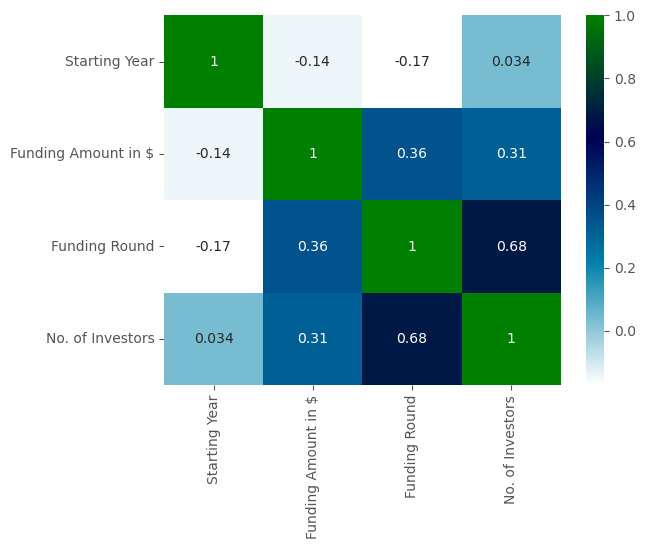

In [8]:
#Correlation matrix
sns.heatmap(data.corr(),annot=True,cmap='ocean_r')

# EXPLORE DATA ANALYSIS

array([[<AxesSubplot:title={'center':'Funding Amount in $'}, xlabel='[No. of Investors]'>,
        <AxesSubplot:title={'center':'Funding Round'}, xlabel='[No. of Investors]'>],
       [<AxesSubplot:title={'center':'Starting Year'}, xlabel='[No. of Investors]'>,
        <AxesSubplot:>]], dtype=object)

<Figure size 1600x800 with 0 Axes>

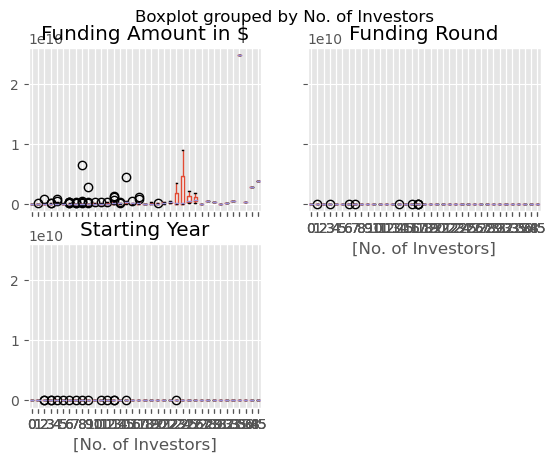

In [9]:
plt.figure(figsize=(16,8))
data.boxplot(by='No. of Investors')

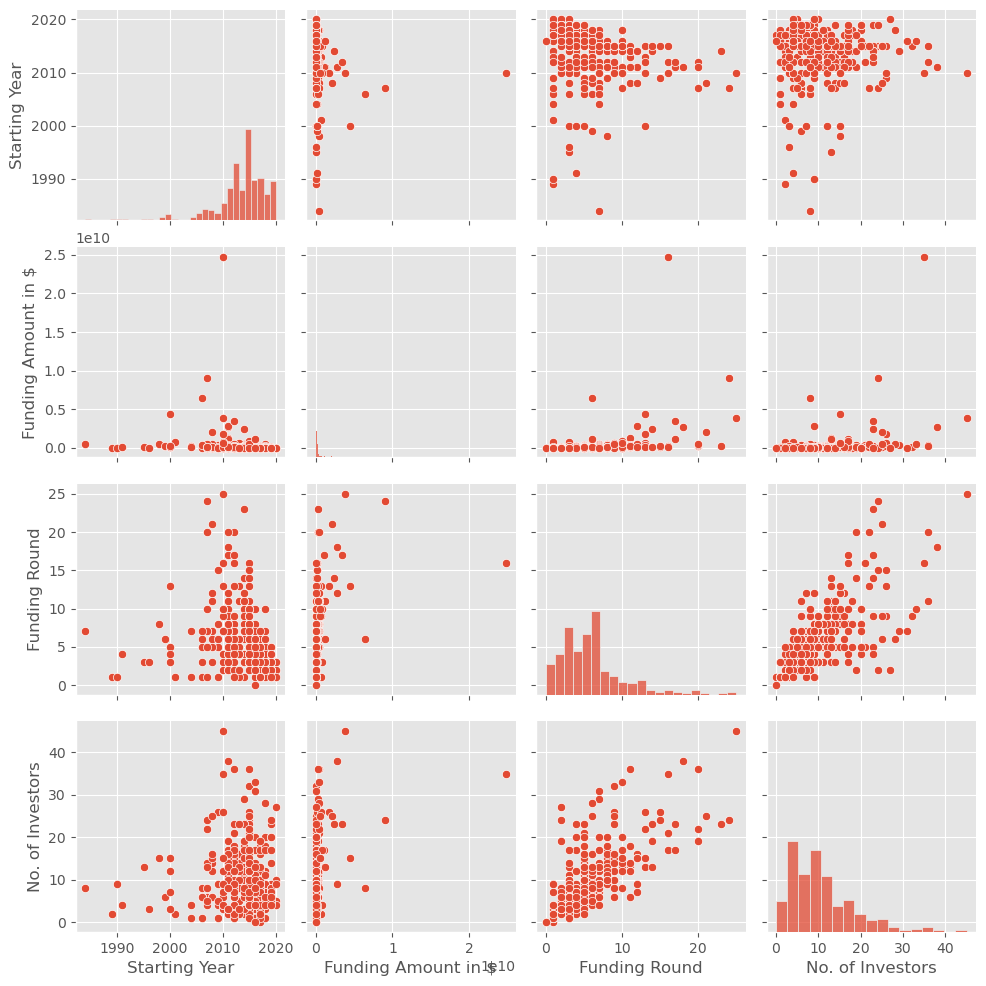

In [10]:
sns.pairplot(data)

Text(0, 0.5, 'Count of the companys')

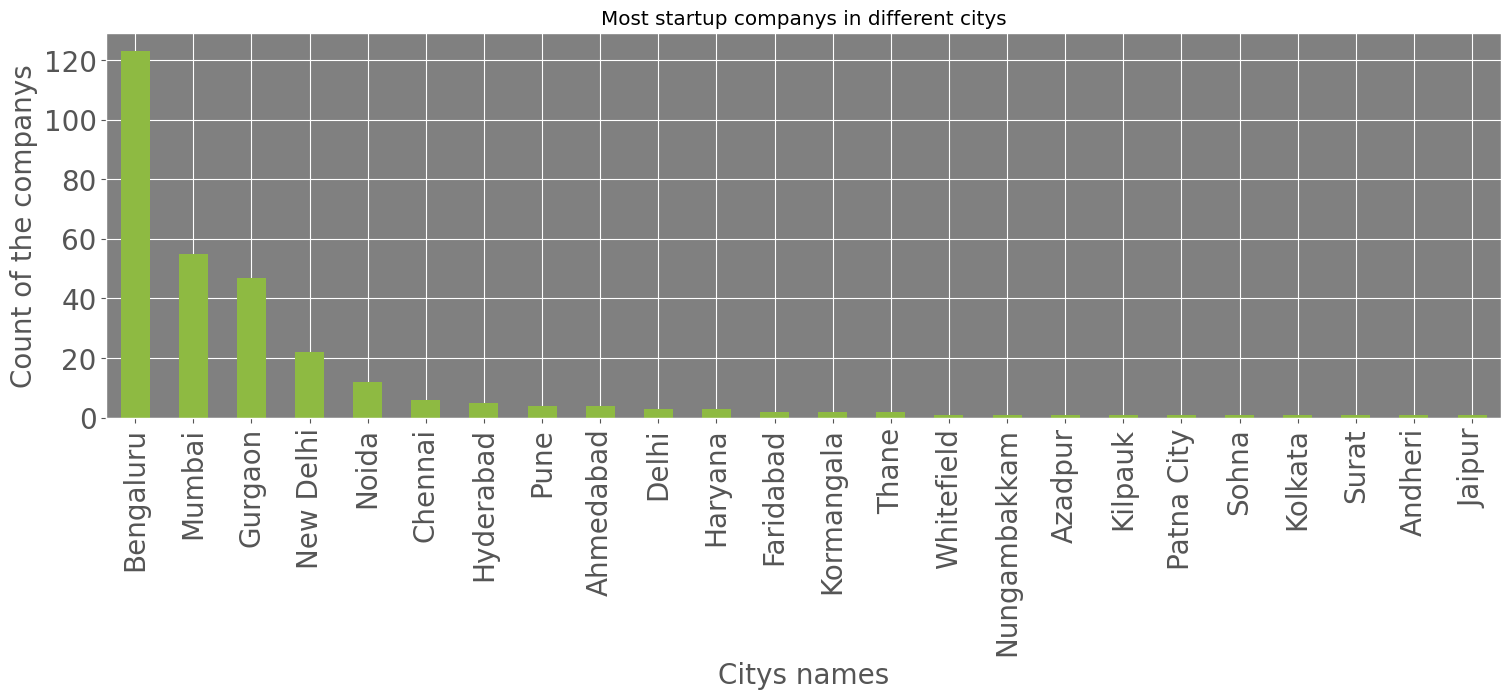

In [11]:
#which city have more startup companys in the data
plt.rcParams['axes.facecolor']='gray'
ax=data['City'].value_counts()\
.sort_values(ascending=False)\
.plot(kind='bar',title='Most startup companys in different citys',figsize=(18,5),color=color[5],fontsize=20)
ax.set_xlabel("Citys names",fontsize=20)
ax.set_ylabel("Count of the companys",fontsize=20)

# About the chart
*  From the above bar chart we get most startup companys located in Bengaluru,After that Mumbai,Gurganon, New Delhi
*  Jaipur have low startup companys in the data *

In [12]:
# write a query for identify the mukesh ambani companys
data.query('Founders == "Mukesh Ambani"')

,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
32,Reliance Jio,Mumbai,2010,Mukesh Ambani,"Apps, Information Services, Internet, Telecomm...",Reliance Jio is a telecommunications firm that...,10001+,24767620475,16,35
37,Reliance Retail,Mumbai,2006,Mukesh Ambani,"Consumer Goods, Grocery, Retail",Reliance Retail operates a chain of local stor...,10001+,6419310306,6,8


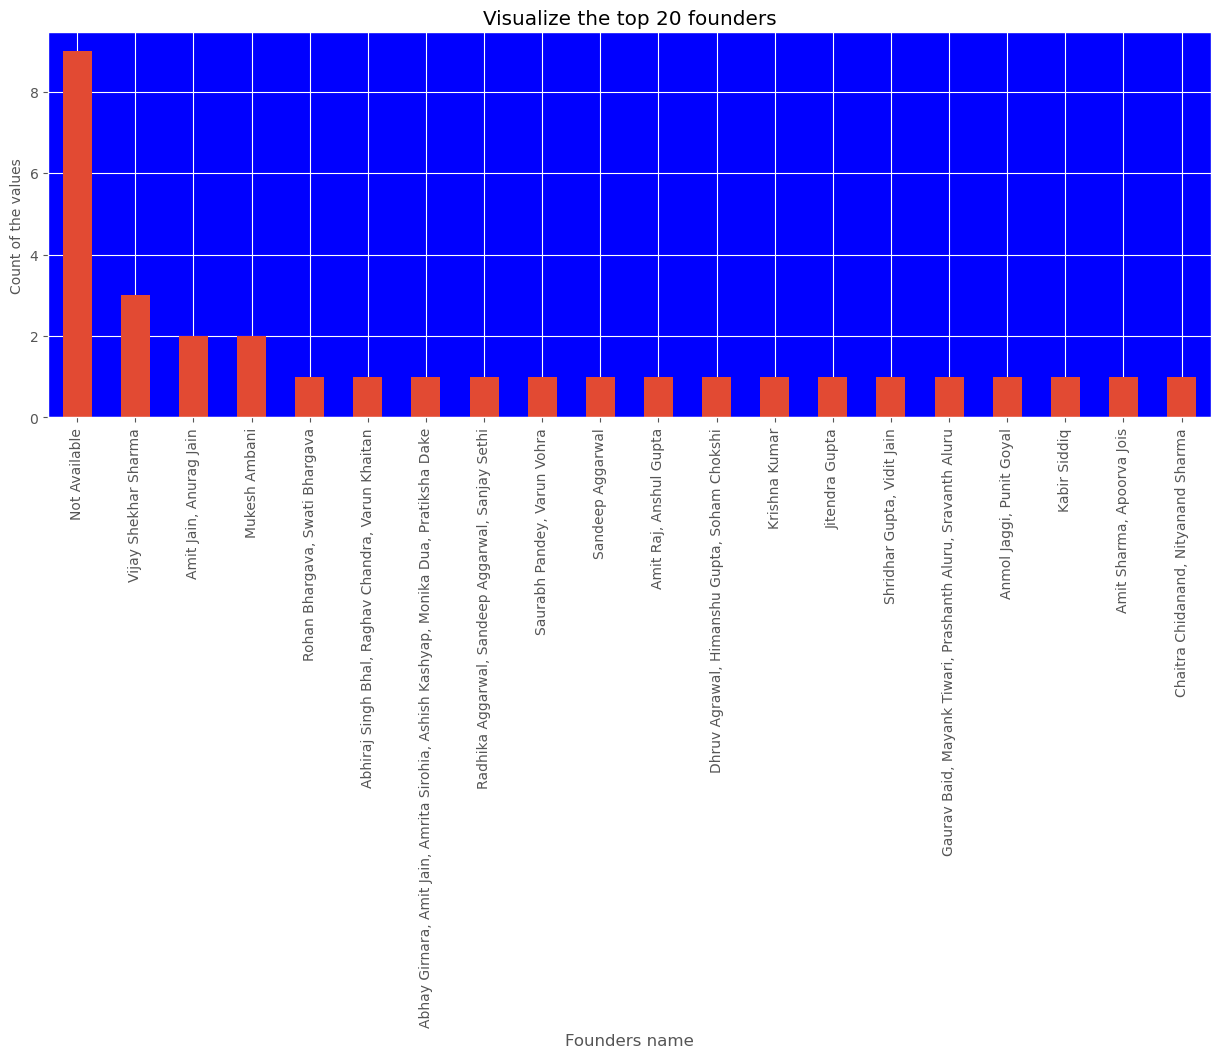

In [13]:
#Visualize the top 20 founders name in data
plt.rcParams['axes.facecolor']='blue'
ax=data['Founders'].value_counts()[:20]\
.sort_values(ascending=False)\
.plot(kind='bar',title='Visualize the top 20 founders',figsize=(15,5))
ax.set_xlabel("Founders name")
ax.set_ylabel("Count of the values",fontsize=10)
plt.show()

# About the Founder's Bar
* In the data we visualize the founder's name in the data most of the founder data not availble
* After that Vijay Shanker sharma have founded Three company's
* Mukesh Ambani,Amit jain, Anurag jain

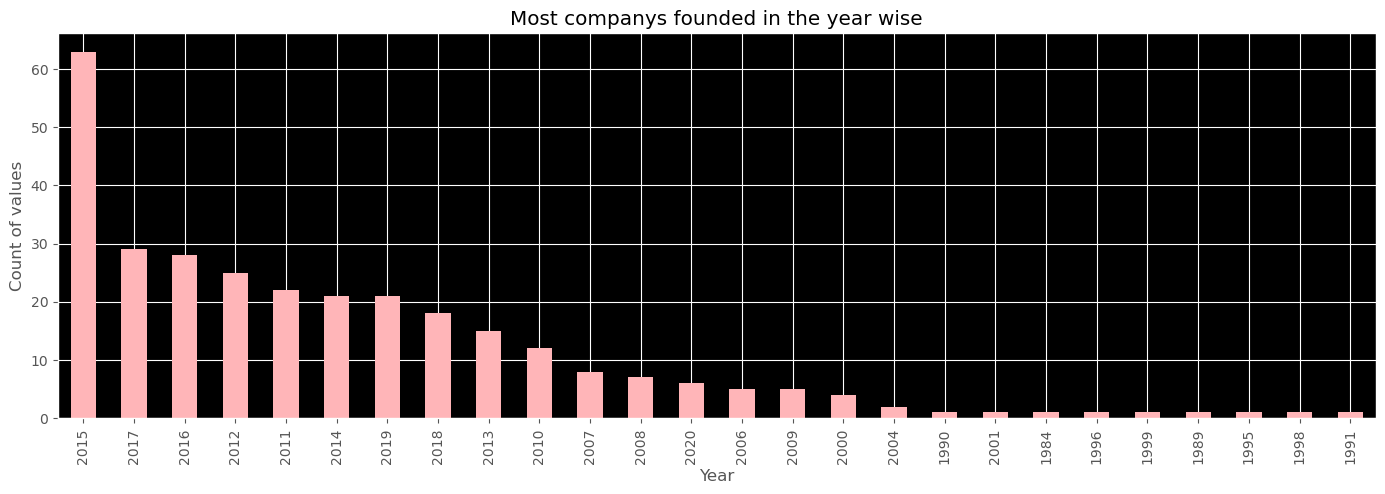

In [14]:
# find the which year most companys started
plt.rcParams['axes.facecolor']='black'
ax=data['Starting Year'].value_counts()\
.plot(kind='bar',title='Most companys founded in the year wise',figsize=(17,5),color=color[6])
ax.set_xlabel("Year")
ax.set_ylabel("Count of values")
plt.show()

# About the barplot:
* From the above plot we have data from 1991-2020
* In the  year 2015 most company's founded.
* 2017 more company founded compare to 2020
* In the year 1991 less company's founded compare to other year's

In [15]:
data.groupby('Company')['Funding Amount in $'].sum().sort_values()

Company
WOW Skin Science India Ltd                        0
Digital Class E-Learning Marketplace          42000
Convin                                       300000
Polygon (Previously Matic Network)           450000
BimaPe                                       545000
                                           ...     
Ola                                      3808672049
One97                                    4432652051
Reliance Retail                          6419310306
Flipkart                                 9009184737
Reliance Jio                            24767620475
Name: Funding Amount in $, Length: 300, dtype: int64

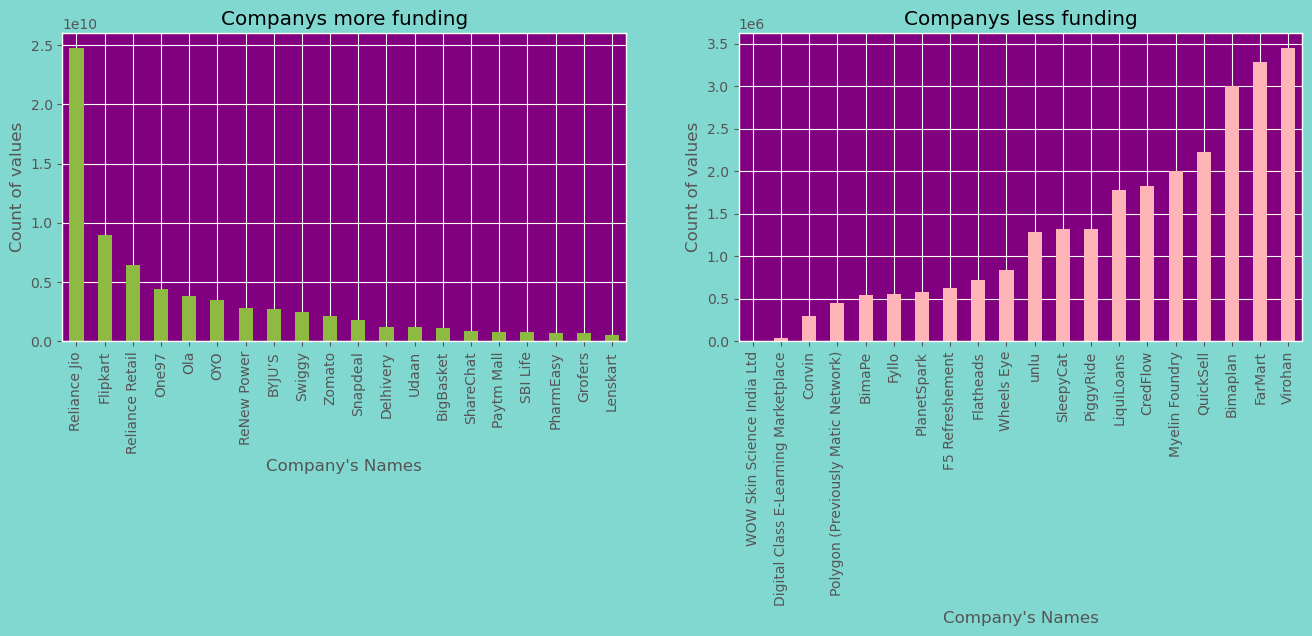

In [16]:
#Find the which company's have more funding in the data
plt.rcParams['axes.facecolor']='#800080'
plt.rcParams['figure.facecolor']='#81D8D0'
plt.subplots(1,2,figsize=(25,6))
plt.subplot(121)
fig=data.groupby('Company')['Funding Amount in $'].sum()\
.sort_values(ascending=False)[:20]\
.plot(kind='bar',title='Companys more funding',figsize=(16,4),color=color[5])
fig.set_xlabel("Company's Names")
fig.set_ylabel("Count of values")
plt.subplot(122)
fig=data.groupby('Company')['Funding Amount in $'].sum()\
.sort_values()[:20]\
.plot(kind='bar',title='Companys less funding',figsize=(16,4),color=color[6])
fig.set_xlabel("Company's Names")
fig.set_ylabel("Count of values")
plt.show()

# About the plot: 
* We Visualize the Top 20 Companys more funding recevied
* Reliance jio recevied more funding in the data, Then Flipkart recevid less then reliance jio.
* Wow skin science not recevied funding 2020, after that digital class E-learning revied 42000

<AxesSubplot:ylabel='No. of Employees'>

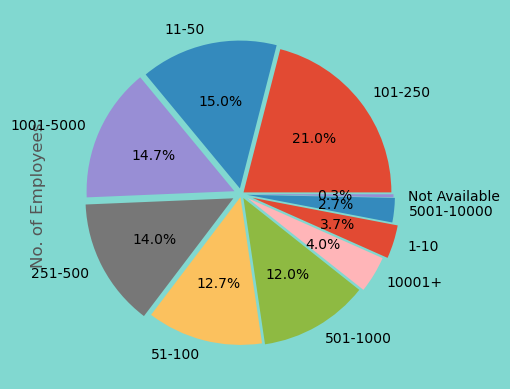

In [17]:
#Let's find the how many compnays medium and large companys in the dataset
data['No. of Employees'].value_counts()\
.plot(kind='pie',labels=data['No. of Employees'].value_counts().index,autopct='%1.1f%%',explode=[0.02,0.04,0.05,0.06,0.02,0.03,0.05,0.08,0.04,0.03])

# About Pie Chart :
* From the above chart most company's have employee range 101-250.
* Just 2.7 % company's have employee range 5000-10000
* 15.0% company's have employees range 11-50

In [18]:
data.groupby('Company')['No. of Investors'].sum().sort_values()

Company
Digital Class E-Learning Marketplace     0
WOW Skin Science India Ltd               0
RateGain                                 1
Magicbricks                              1
Avataar.Me                               1
                                        ..
Reliance Jio                            35
ZoomCar                                 36
Unacademy                               36
BYJU’S                                  38
Ola                                     45
Name: No. of Investors, Length: 300, dtype: int64

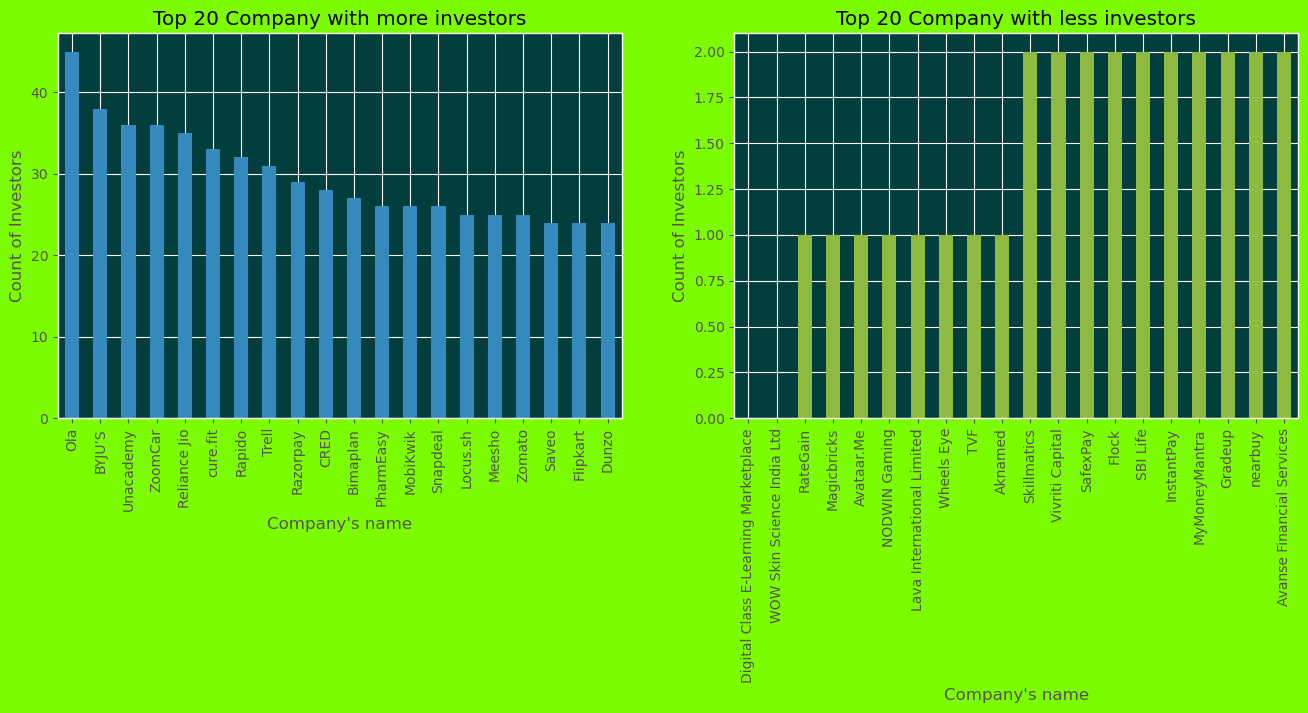

In [19]:
#Find the investor of the each companys
plt.rcParams['axes.facecolor']='#033E3E'
plt.rcParams['figure.facecolor']='#7CFC00'
plt.subplots(1,2,figsize=(17,5))
plt.subplot(121)
fig1=data.groupby('Company')['No. of Investors'].sum()\
.sort_values(ascending=False)[:20]\
.plot(kind='bar',figsize=(16,5),title='Top 20 Company with more investors',color=color[1])
fig1.set_xlabel("Company's name")
fig1.set_ylabel("Count of Investors")
plt.subplot(122)
fig2=data.groupby('Company')['No. of Investors'].sum()\
.sort_values(ascending=True)[:20]\
.plot(kind='bar',figsize=(16,5),title='Top 20 Company with less investors',color=color[5])
fig2.set_xlabel("Company's name")
fig2.set_ylabel("Count of Investors")
plt.show()

# About the barplot:
* In the above chart we visualize top 20 and more and less investors as per 2020.
* From the first bar OLA have more invesots compare to other's. After That Byjus,Unacademy etc.
* In the second plot we visualize the bar chart with less investors
* Digital class and Wow skin science no investors as per 2020, Then Rategain and magicbris have 1 investors.

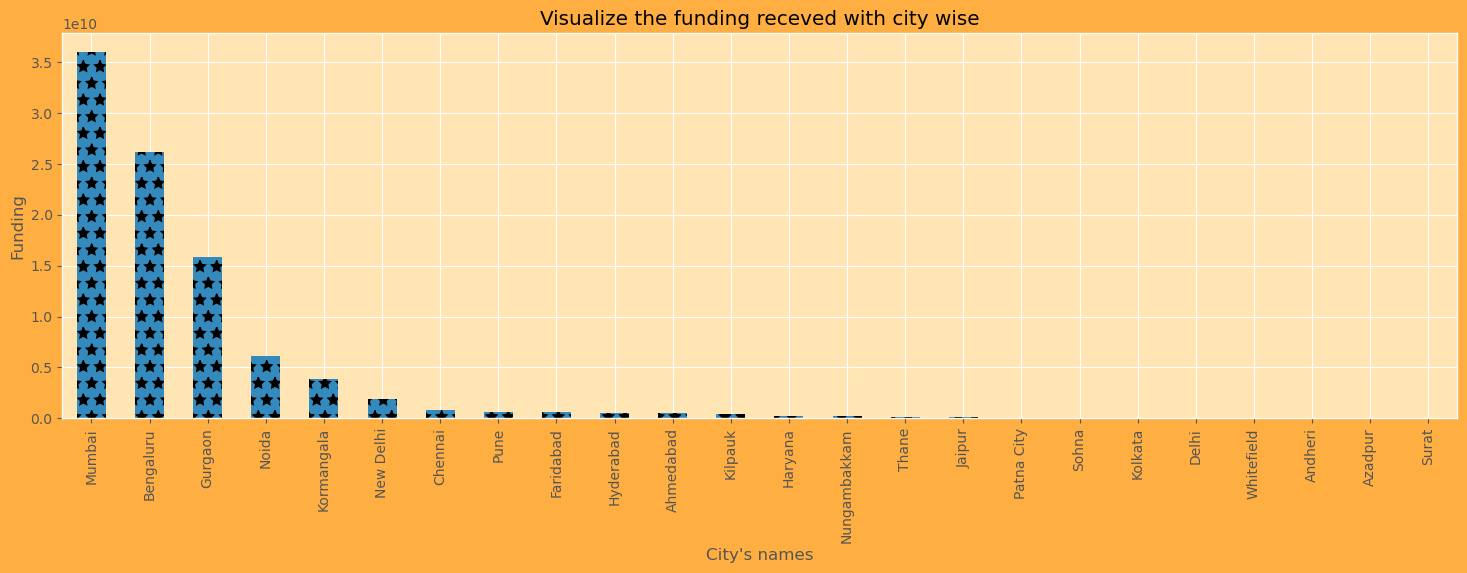

In [20]:
#find the which city recevied more funding
plt.rcParams['axes.facecolor']='#FFE5B4'
plt.rcParams['figure.facecolor']='#FFAE42'
city=data.groupby('City')['Funding Amount in $'].sum()\
.sort_values(ascending=False)\
.plot(kind='bar',title='Visualize the funding receved with city wise',figsize=(18,5),color=color[1],hatch='*')
city.set_xlabel("City's names")
city.set_ylabel("Funding")
plt.show()

# About the chart :
* From the above chart Mumbai has recevied more funding compare to other.
* After that bengaluru,gurgaon,noida etc.
* Surat and azadpur not recevied any funding as per this data 

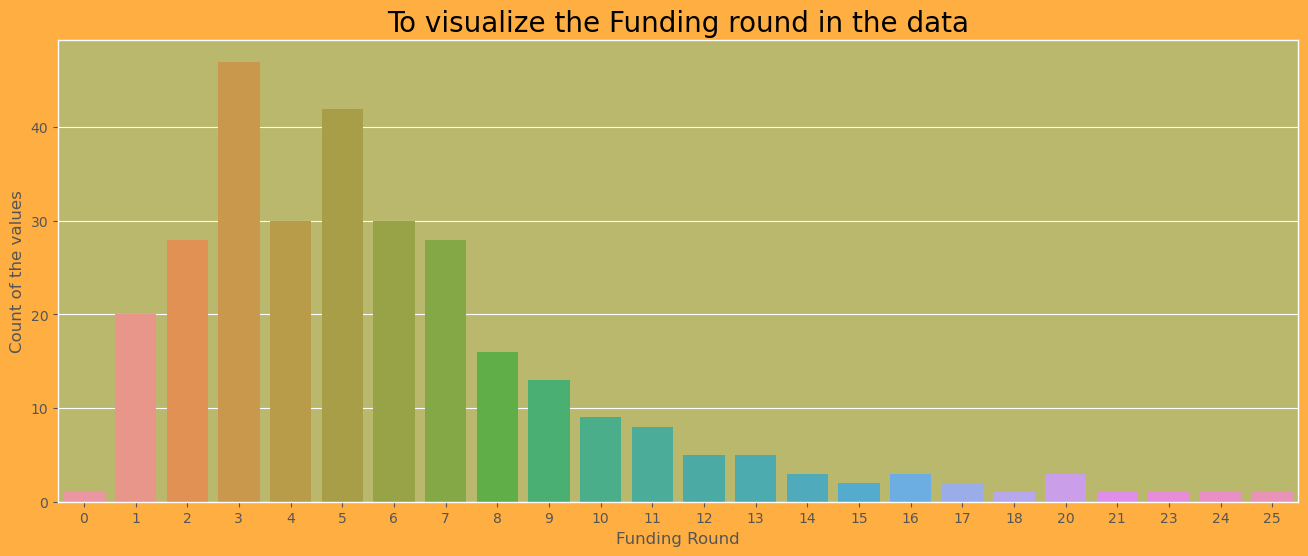

In [21]:
#To visualize the Funding round in the dataset
plt.rcParams['axes.facecolor']='#BAB86C'
plt.rcParams['figure.facecolor']='#FFAE42'
fig,ax=plt.subplots(figsize=(16,6))
sns.countplot(data=data,x='Funding Round',ax=ax)
plt.title("To visualize the Funding round in the data",fontsize=20)
plt.xlabel("Funding Round")
plt.ylabel("Count of the values")
plt.show()

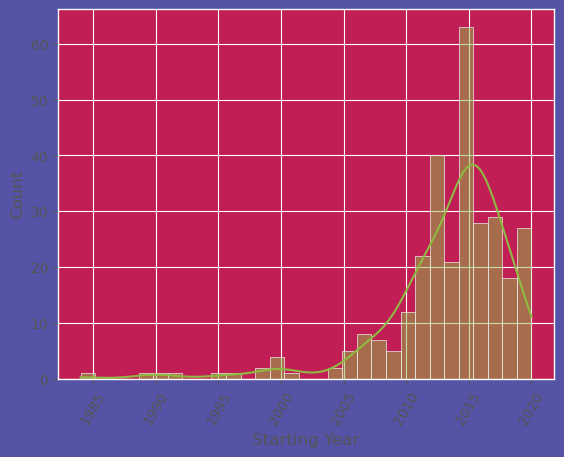

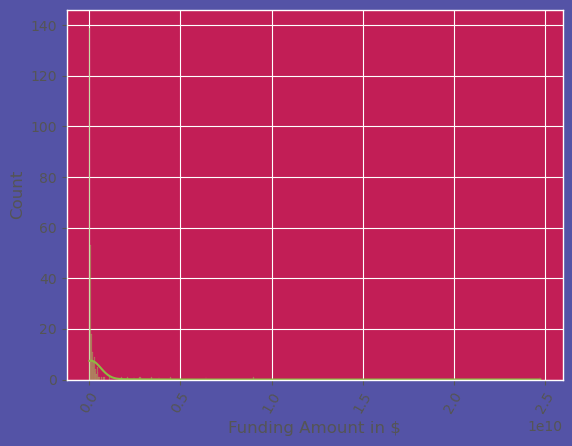

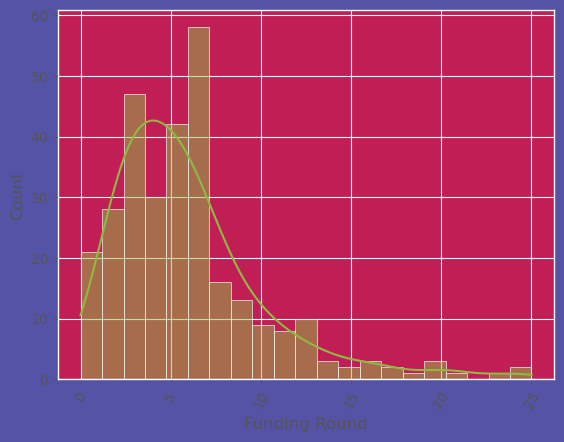

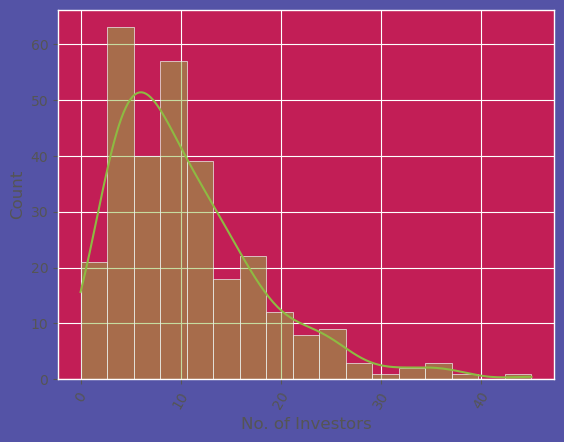

In [22]:
#Select the numerical columns and visualize box plot
plt.rcParams['axes.facecolor']='#C21E56'
plt.rcParams['figure.facecolor']='#5453A6'
for i in data.select_dtypes(include='int'):
    sns.histplot(x=data[i],data=data,color=color[5],kde=True)
    plt.xticks(rotation=60)
    plt.show()

Text(0, 0.5, 'Year')

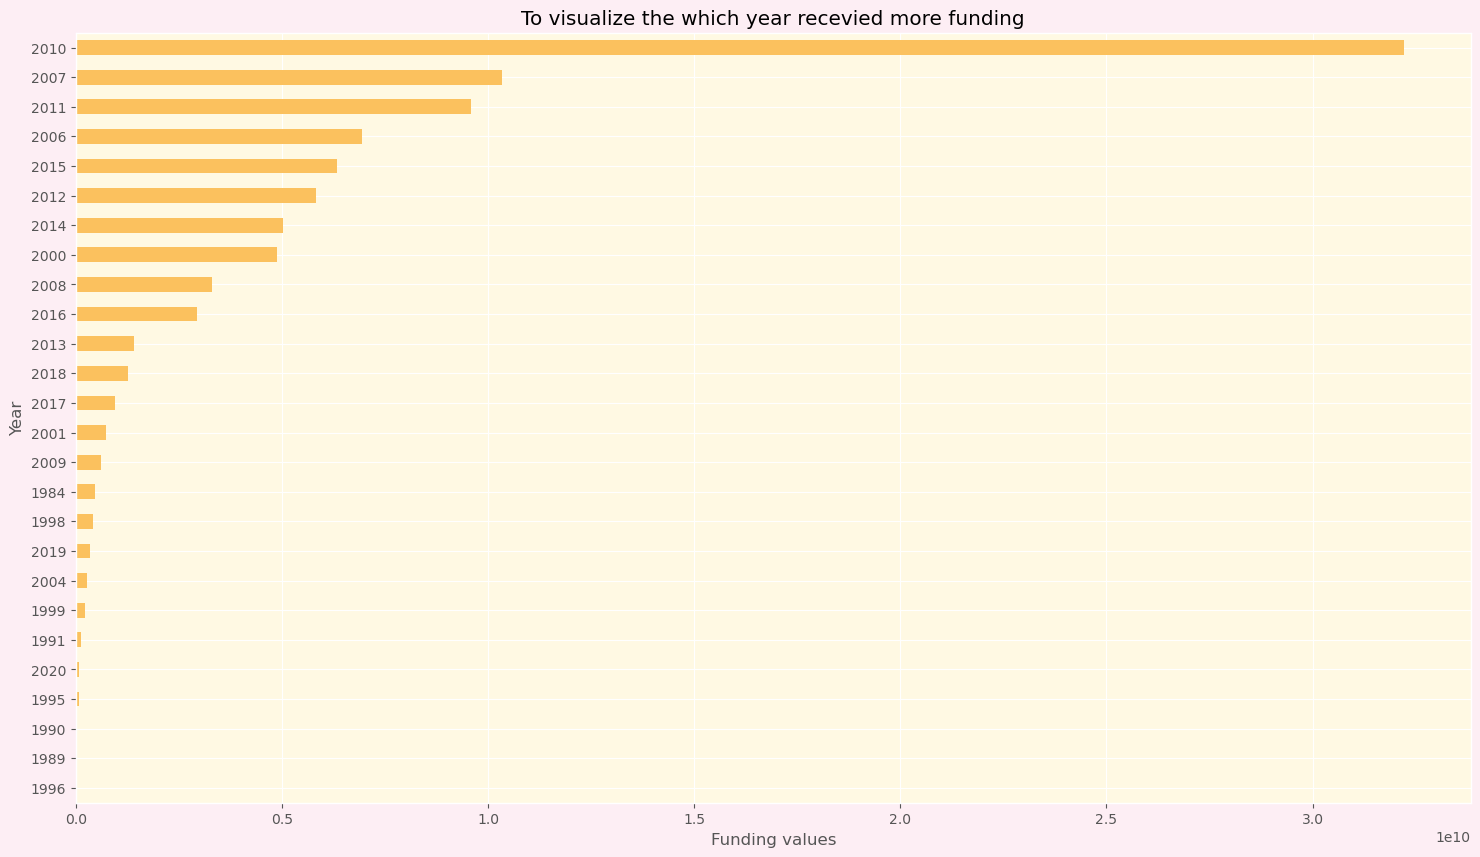

In [23]:
#In which year more funding recevied 
plt.rcParams['axes.facecolor']='#FFF9E3'
plt.rcParams['figure.facecolor']='#FDEEF4'
ax=data.groupby('Starting Year')['Funding Amount in $'].sum()\
.sort_values(ascending=True)\
.plot(kind='barh',title='To visualize the which year recevied more funding',figsize=(18,10),color=color[4])
ax.set_xlabel("Funding values")
ax.set_ylabel("Year")

# About plot :
* From the above chart we visualize which year more funding we recevied.
* in the year 2010 more funding recevied,and next 2017 recevied funding.
* 1996 year funding not recevied

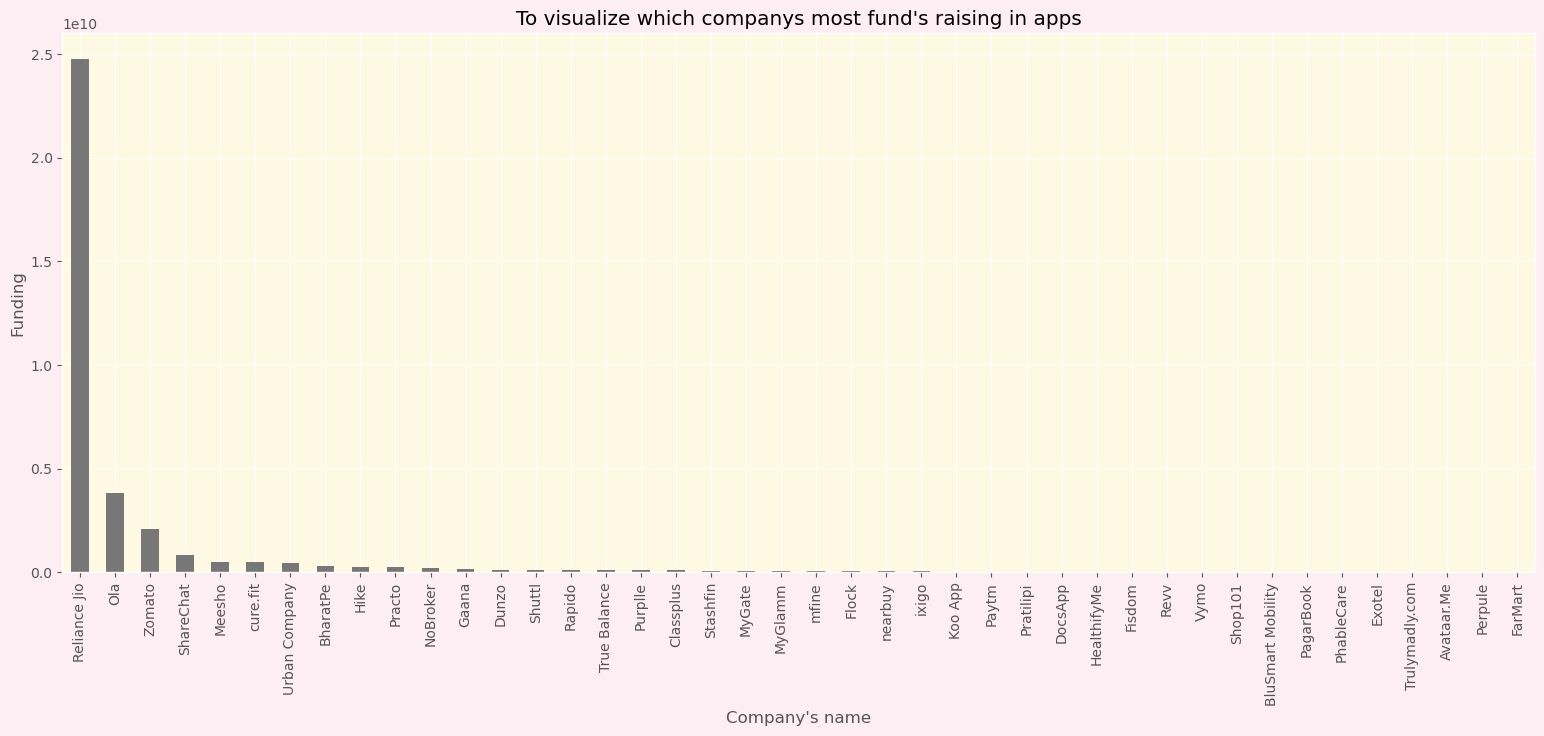

The total funding recevied from the apps deveploment in companys 35447031698


In [24]:
#Whcih company's recevied for apps funding this is not particuler for apps . The founding about all the industries
app=data[data['Industries'].str.contains('Apps')]
ax=app.groupby('Company')['Funding Amount in $'].sum()\
.sort_values(ascending=False)\
.plot(kind='bar',title="To visualize which companys most fund's raising in apps",figsize=(19,7),color=color[3])
ax.set_xlabel("Company's name")
ax.set_ylabel("Funding")
plt.show()
print(f'The total funding recevied from the apps deveploment in companys',app['Funding Amount in $'].sum())

# About the chart :
*  We create a dataset for apps which compnay's provide the apps information.
* Then we visualize which company recevied more funding for app 
* This graph show's that only apps funding but in reality the funding not for apps.

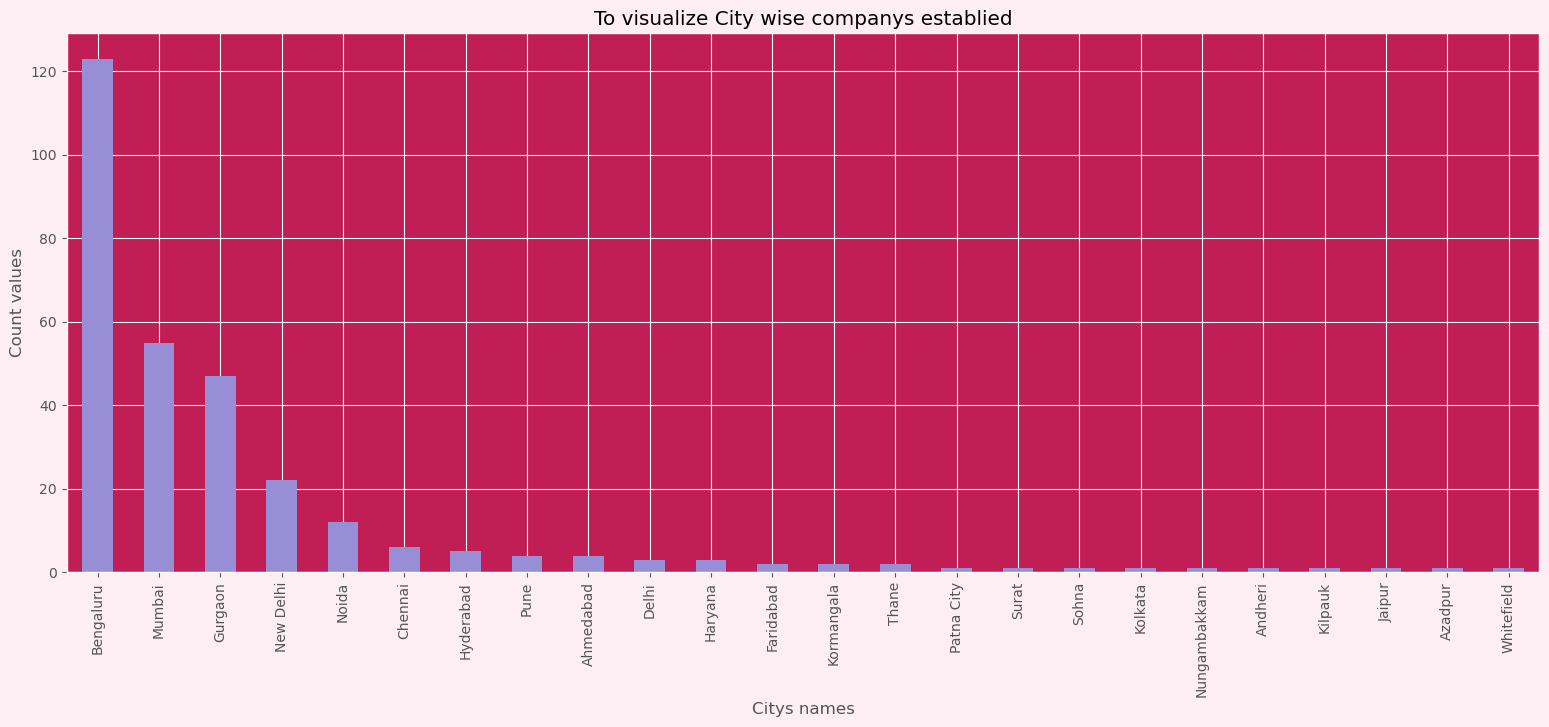

In [25]:
#To visualize the how may companys establish in city wise
plt.rcParams['axes.facecolor']='#C21E56'
plt.rcParams['figure.facecolor']='#FDEEF4'
ax=data.groupby('City')['Company'].count()\
.sort_values(ascending=False)\
.plot(kind='bar',title="To visualize City wise companys establied",figsize=(19,7),color=color[2])
ax.set_xlabel('Citys names')
ax.set_ylabel("Count values")
plt.show()

# About the chart
* From the above chart Benguluru have more company's establised.
* After that Mumbai and Gurgaon etc.
* Whitefield have less company's establised.

In [26]:
data.head(1)

,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan","Apps, Home Services, Marketplace, Service Indu...",Urban is a marketplace for independent contrac...,1001-5000,445920356,12,16


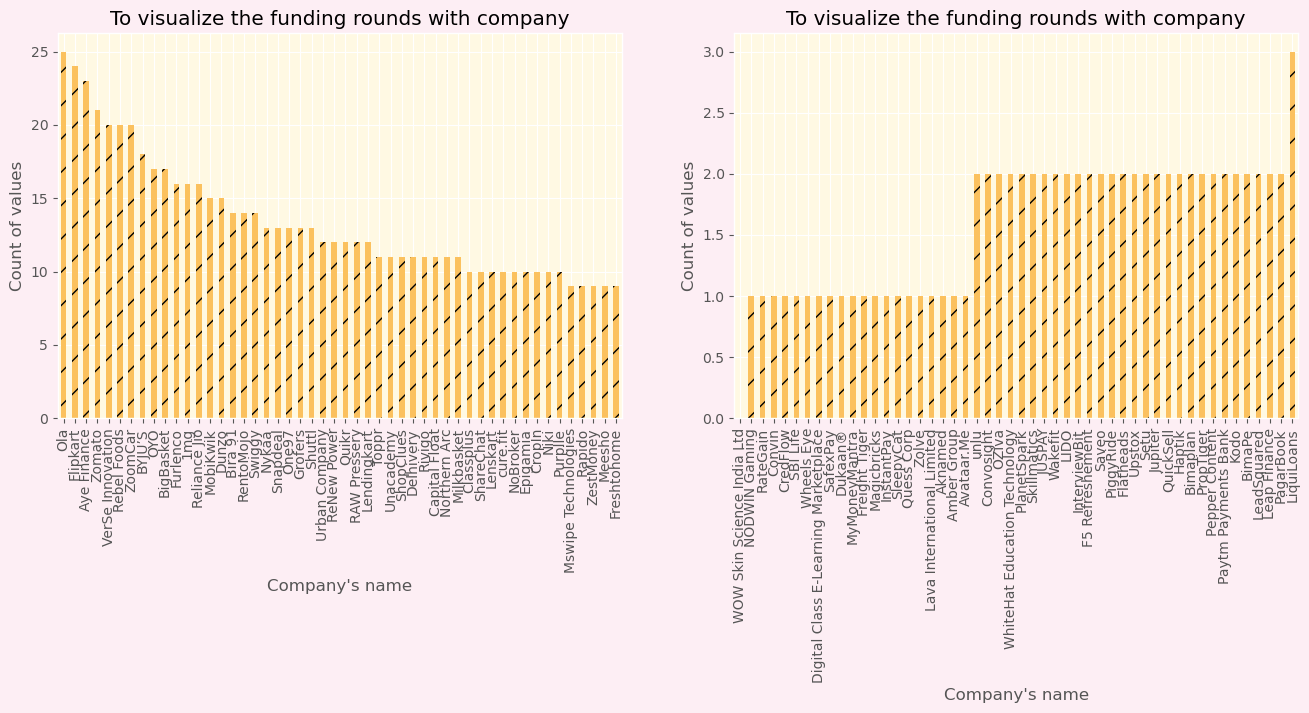

In [27]:
plt.rcParams['axes.facecolor']='#FFF9E3'
plt.rcParams['figure.facecolor']='#FDEEF4'
plt.subplots(figsize=(16,5))
plt.subplot(121)
ax=data.groupby('Company')['Funding Round'].sum()\
.sort_values(ascending=False)[:50]\
.plot(kind='bar',title='To visualize the funding rounds with company',figsize=(16,5),hatch='/',color=color[4])
ax.set_xlabel("Company's name")
ax.set_ylabel('Count of values')
plt.subplot(122)
ax1=data.groupby('Company')['Funding Round'].sum()\
.sort_values(ascending=True)[:50]\
.plot(kind='bar',title='To visualize the funding rounds with company',figsize=(16,5),hatch='/',color=color[4])
ax1.set_xlabel("Company's name")
ax1.set_ylabel('Count of values')
plt.show()

# About the chart's :
* From the above chart we visualize the company's with funding rounds
* Ola companys recevied funding with 25 rounds and after that flipkart in the second company's recevied funding with 23 rounds
* wow skin have no funding rounds in the data.

In [28]:
data['Industries'][0]

'Apps, Home Services, Marketplace, Service Industry'

In [29]:
""" In this code we separtes the all industries into diffent columns.
we use str split menthod once we split the data we concat the data into
main data and fill the None values with no industries.
And create a separe data frame for industre's and visualize in countplot


"""

industries=data['Industries'].str.split(', ', expand=True)
industries.fillna("Unkown")
finall_df=pd.concat([data,industries],axis=1)
finall_df=finall_df.fillna("No industries")

In [30]:
#Create a dataframe for all industries and 
app=finall_df[[0,1,2,3,4,5,6,7,8,9]]
app.head()

,0,1,2,3,4,5,6,7,8,9
0,Apps,Home Services,Marketplace,Service Industry,No industries,No industries,No industries,No industries,No industries,No industries
1,B2B,E-Learning,EdTech,Education,Mobile Apps,SaaS,Software,No industries,No industries,No industries
2,E-Commerce,Finance,Financial Services,Internet,Mobile Apps,Mobile Payments,No industries,No industries,No industries,No industries
3,Employment,Human Resources,Recruiting,Staffing Agency,No industries,No industries,No industries,No industries,No industries,No industries
4,Financial Services,FinTech,Payments,Software,No industries,No industries,No industries,No industries,No industries,No industries


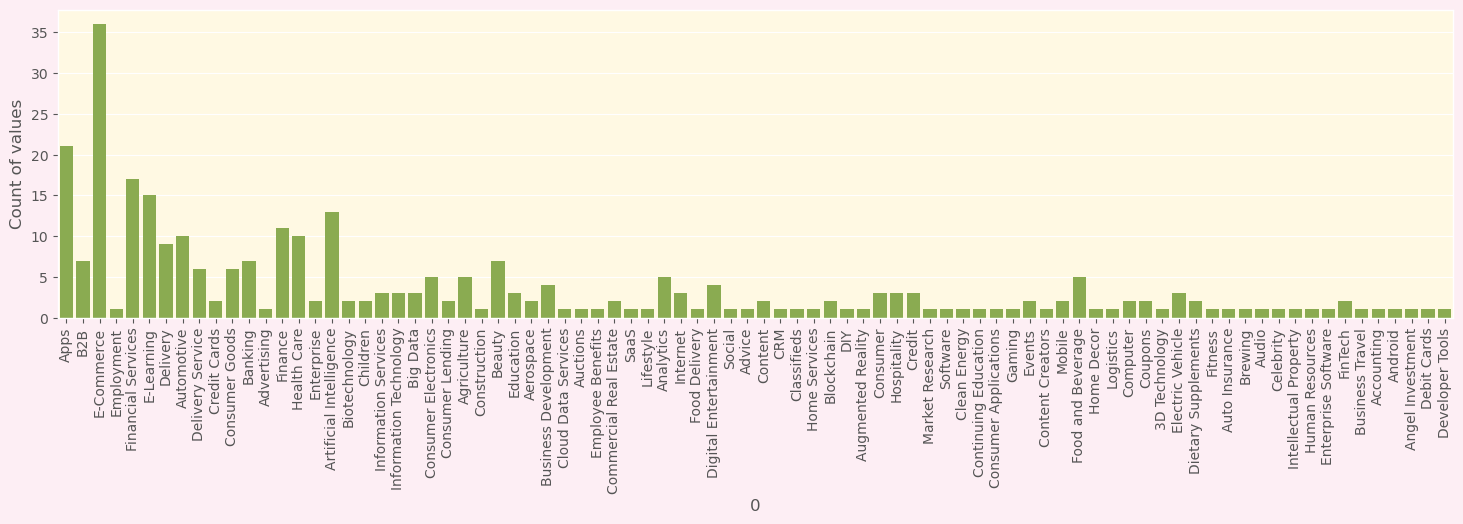

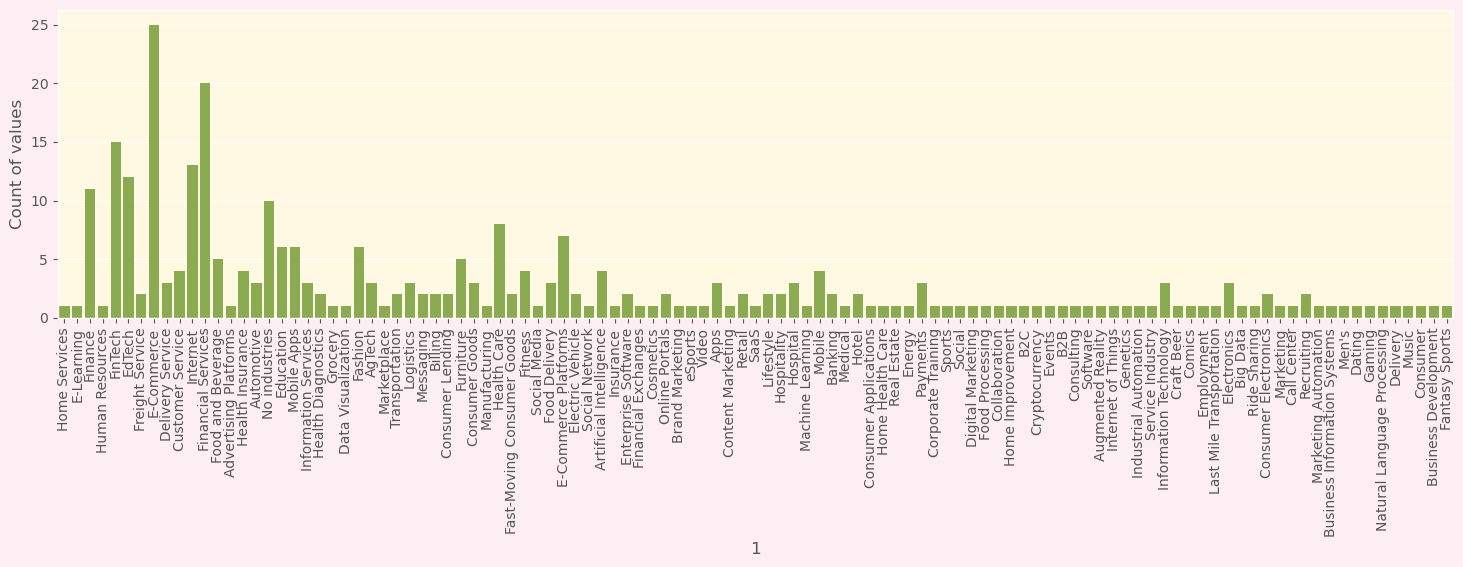

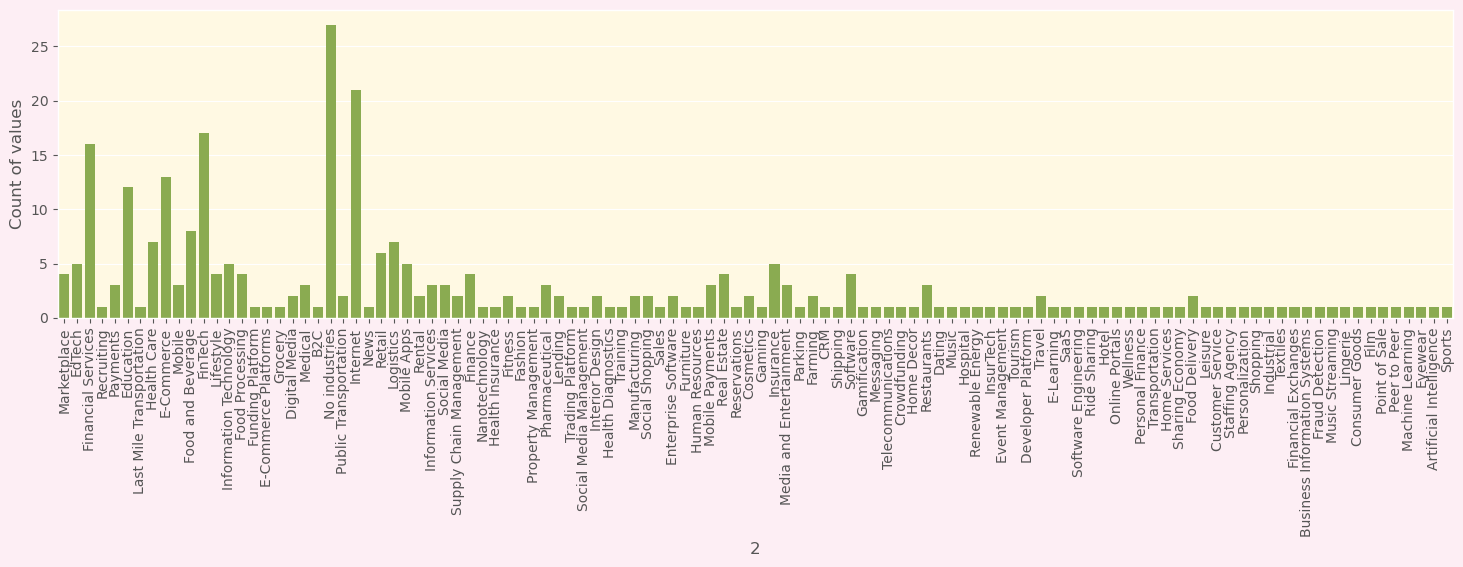

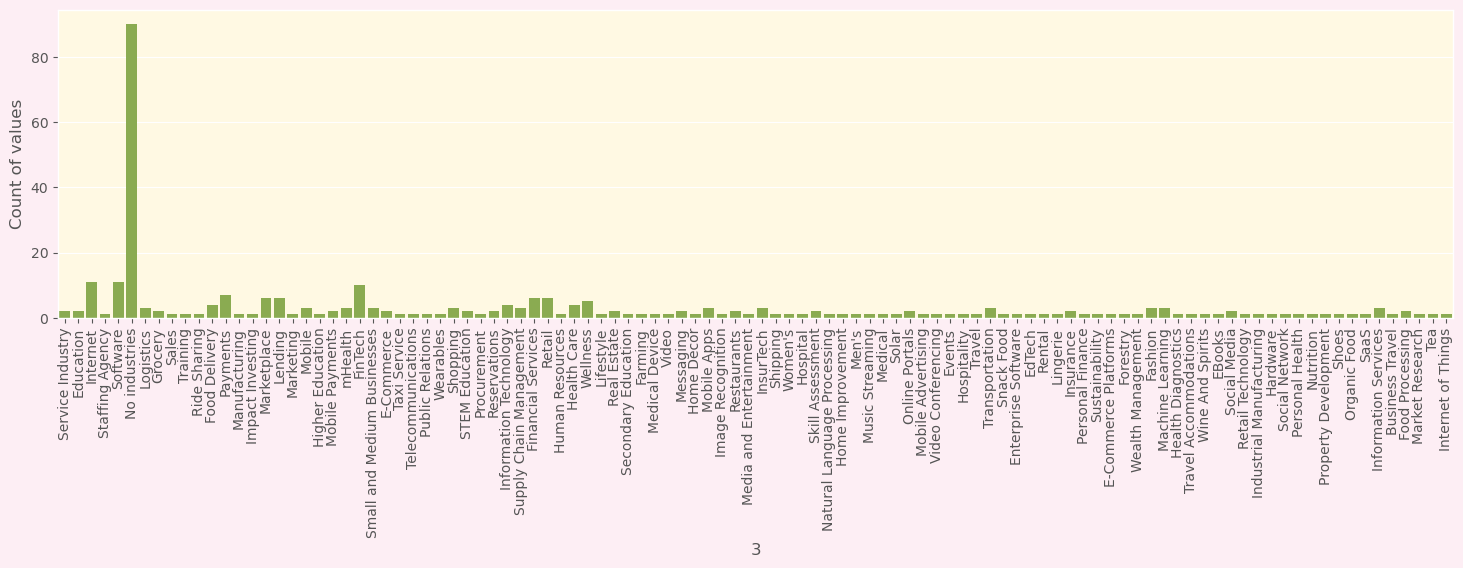

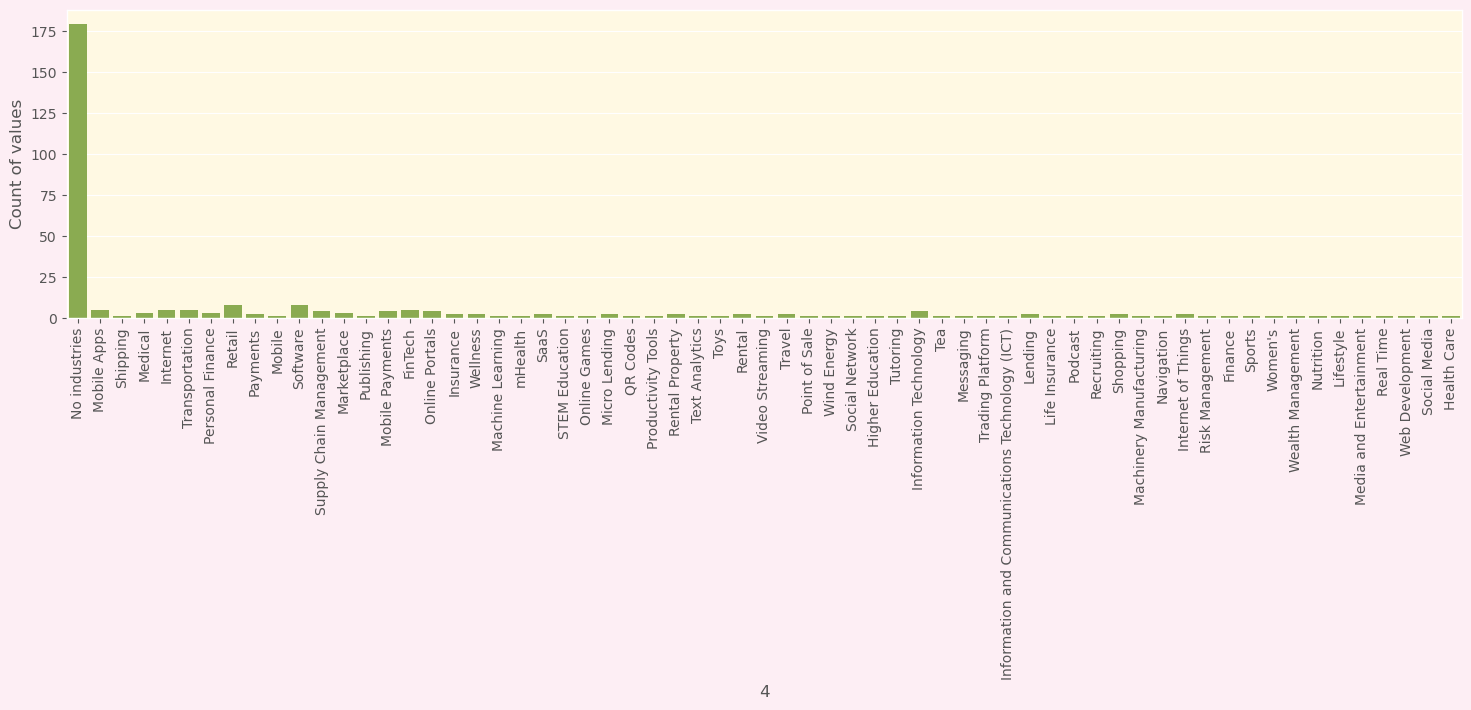

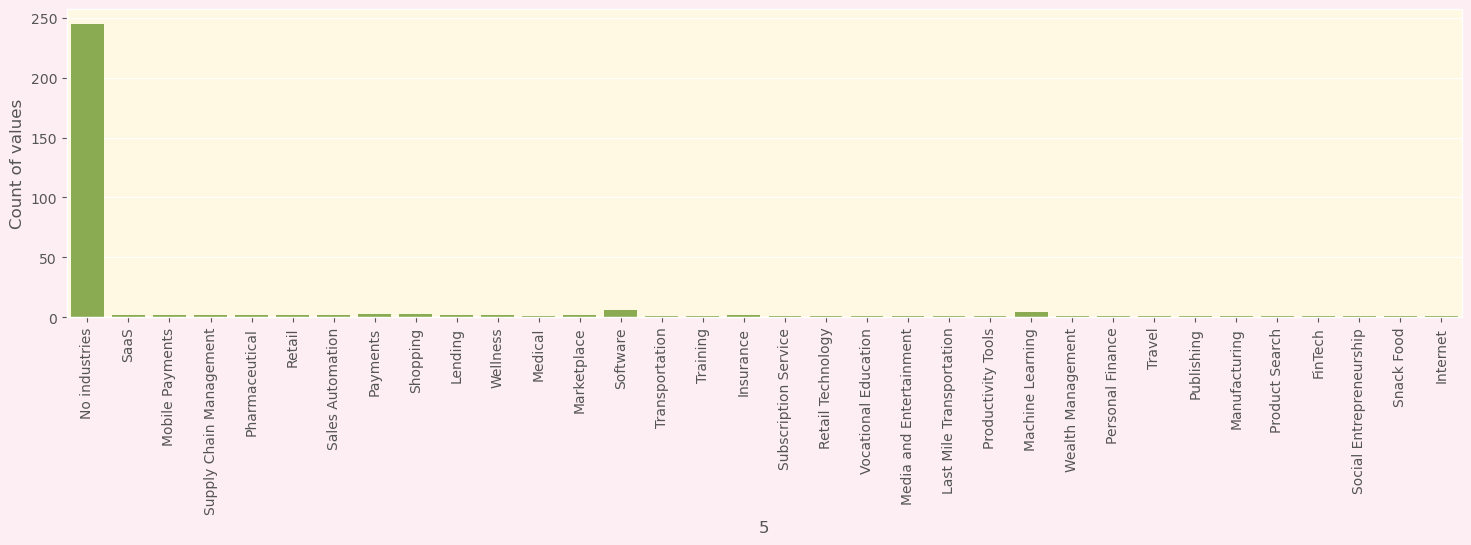

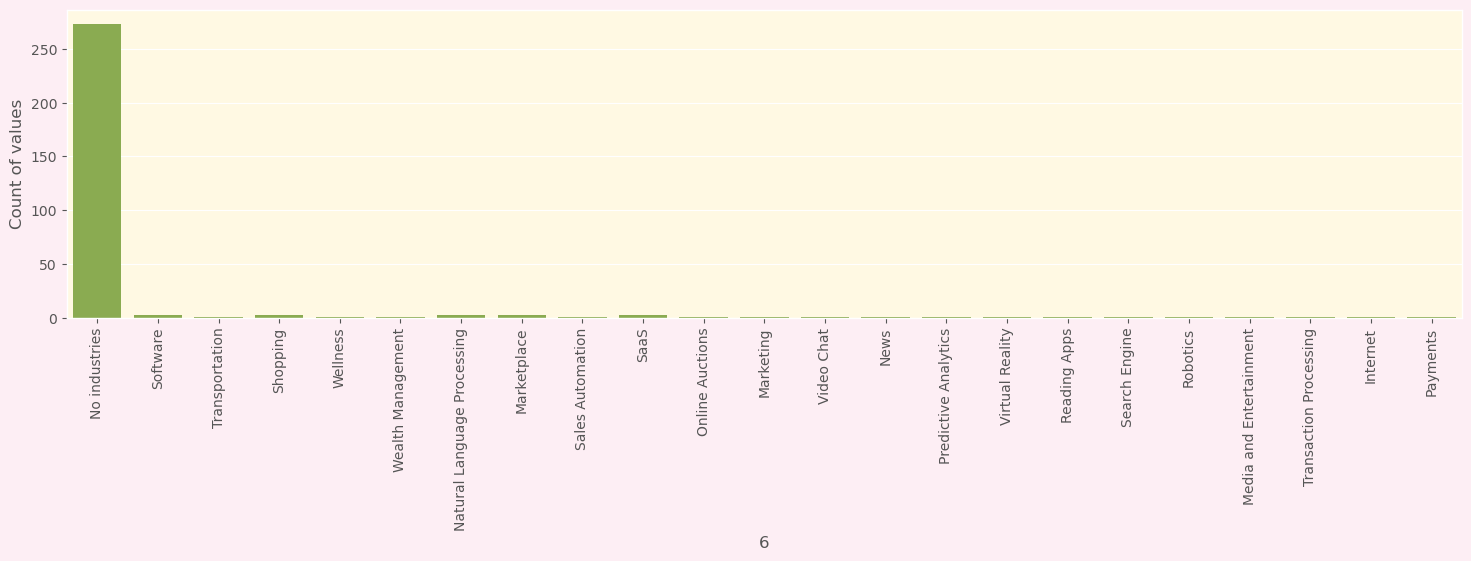

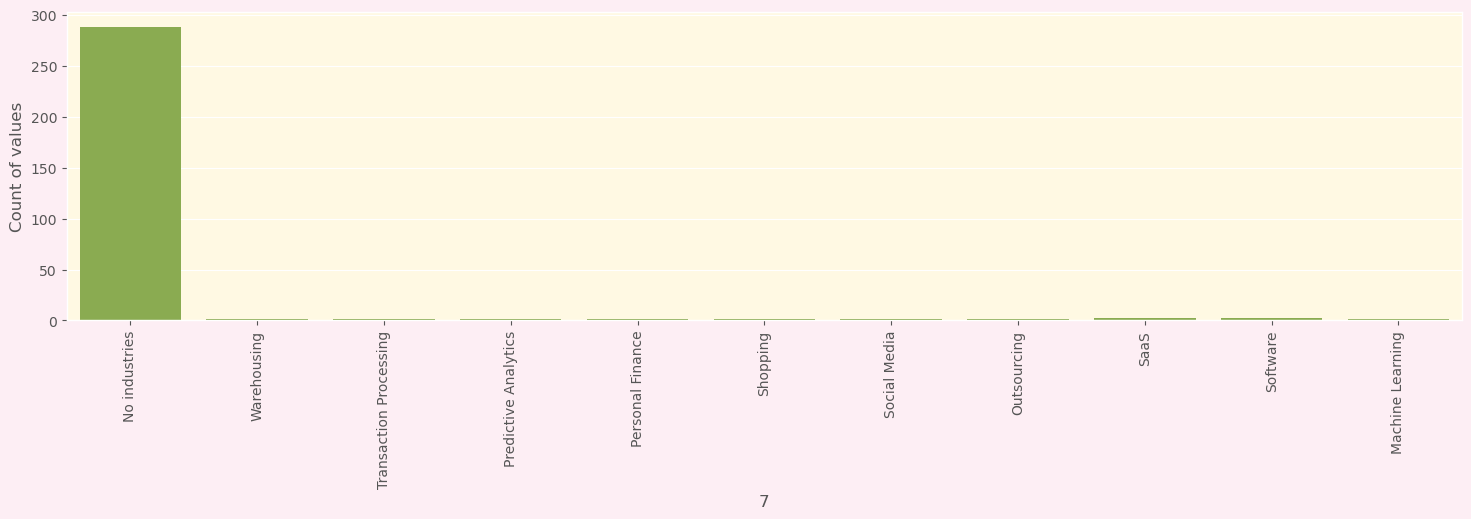

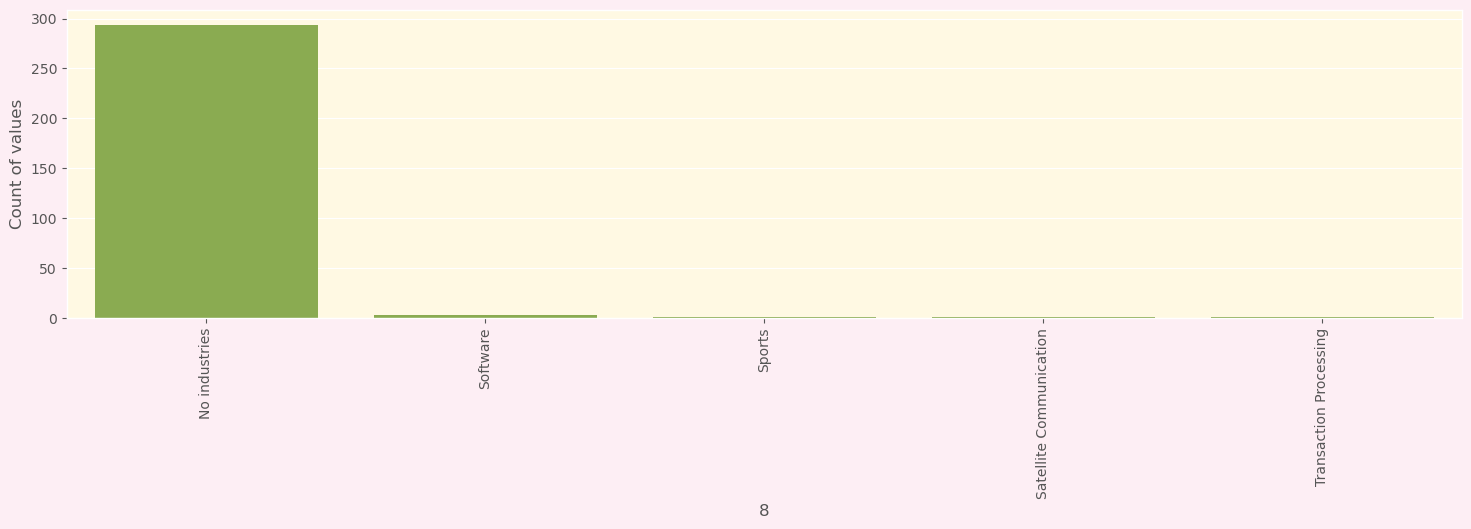

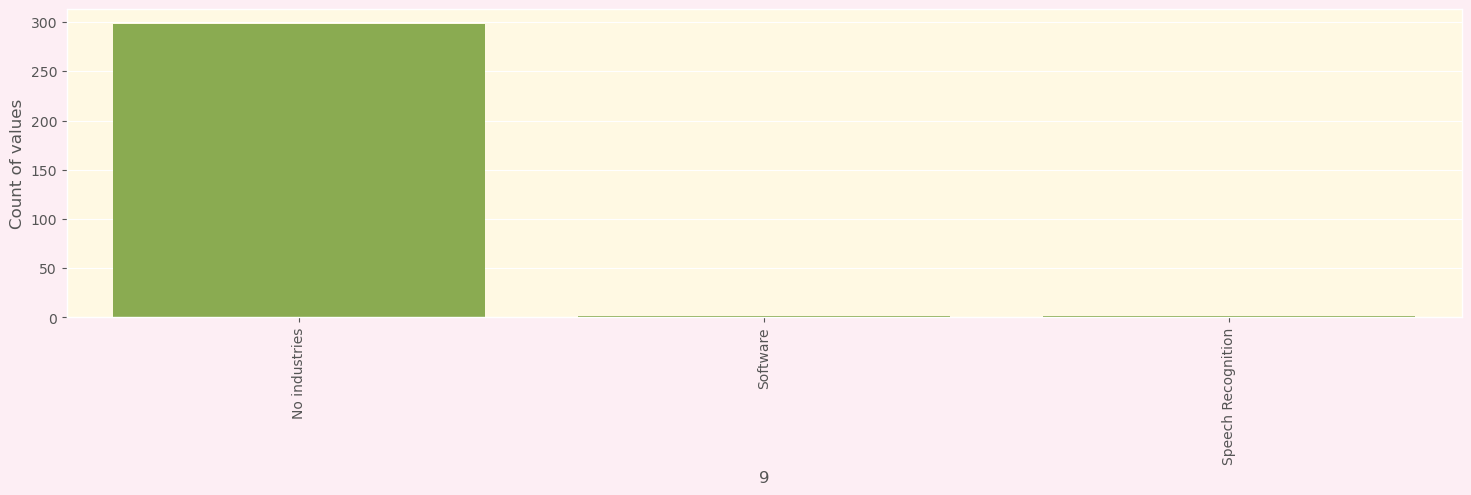

In [31]:
# To visualize the all industries using the countplot 
for i in app.columns:
    plt.figure(figsize=(18,4))
    sns.countplot(data=app,x=app[i],color=color[5])
    plt.xticks(rotation=90)
    plt.ylabel("Count of values")
    plt.show()

In [32]:
finall_df.groupby('Company')[[0,1,2,3,4,5,6,7,8,9]].sum()\
.sort_values(by='Company')\
.style.background_gradient(cmap='Reds')

,0,1,2,3,4,5,6,7,8,9
Company,,,,,,,,,,
1mg,Delivery,E-Commerce,Health Care,Internet,Medical,Pharmaceutical,No industries,No industries,No industries,No industries
Agnikul,Aerospace,Manufacturing,Nanotechnology,No industries,No industries,No industries,No industries,No industries,No industries,No industries
Airmeet,Events,Social,Software,Video Conferencing,No industries,No industries,No industries,No industries,No industries,No industries
Aknamed,Health Care,Hospital,Supply Chain Management,No industries,No industries,No industries,No industries,No industries,No industries,No industries
Amber Group,Consumer Electronics,Electronics,Home Services,Industrial Manufacturing,Machinery Manufacturing,Manufacturing,No industries,No industries,No industries,No industries
Apna,Employment,Human Resources,Recruiting,Staffing Agency,No industries,No industries,No industries,No industries,No industries,No industries
Arzooo.com,Consumer Electronics,Electronics,Retail,Retail Technology,Shopping,No industries,No industries,No industries,No industries,No industries
Ather Energy,Automotive,Electric Vehicle,Manufacturing,No industries,No industries,No industries,No industries,No industries,No industries,No industries
Avail Finance,Finance,FinTech,Mobile Payments,No industries,No industries,No industries,No industries,No industries,No industries,No industries


# Wordcloud generator
* We visualize the words in in indursties and Description
* We use some back ground colors

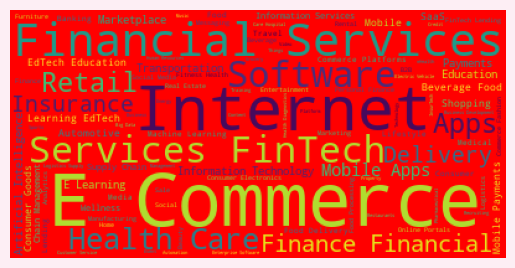

In [33]:
#We import the wordcloud from the 
from wordcloud import WordCloud
text3 = ' '.join(finall_df['Industries'])
wordcloud2 = WordCloud(mode='RGB',background_color='red').generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


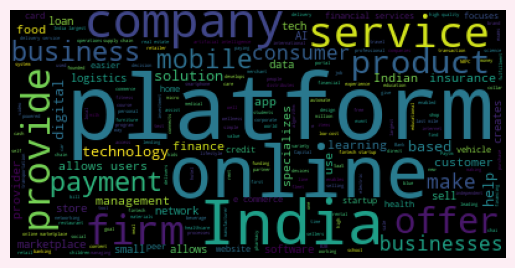

In [34]:
text3 = ' '.join(finall_df['Description'])
wordcloud2 = WordCloud(mode='RGB',background_color='black').generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


# About the  cloud generator
* In the First Cloud generator we visualize the industries and second chart will be genderatd in the descripton.

# ABOUT THE DATA SET :

* > Firstly we load the data and using pandas read function, then do some data cleaning process like null values and duplicate values etc.
* > Then we do some data visualization with data, and visualize the correlation map.
* > in the EDA part we ask the questions from the data and visualize through the barplots,pie charts, distplot etc.
* > the next set we extract the industrie columns and we seperate it and fill with none values into no industires and filter with groupby
* > Finally i use worldcloud generatior two visualize the industries and descrption.